# Assignment 5

COPY WITH NOTES FROM CLASS

Sabine Segaloff
10/16/25

### Do all four questions.

# Q1
**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## 1a.
a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [4]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [ ]:
A@e_1

array([1, 4, 7])

**$Ae_1$ is selecting the first column of $A$.** That is because the matrix multiplication does the following:

$$Ae_1 = (\text{1st column of } A) \cdot e_a + (\text{2nd column of } A) \cdot e_b + (\text{3rd column of } A) \cdot e_c$$

Where $e_a$, $e_b$, and $e_c$ are the first, second, and third elements of the vector $e_1$, respectively.

So, in this case:
$$
Ae_1 =
\left[ \begin{array}{c} 1 \\ 4 \\ 7
\end{array} \right] \cdot 1 + \left[ \begin{array}{c} 2 \\ 5 \\ 8
\end{array} \right] \cdot 0 + \left[ \begin{array}{c} 3 \\ 6 \\ 9
\end{array} \right] \cdot 0
$$

$$
Ae_1 =
\left[ \begin{array}{c} 1 \\ 4 \\ 7
\end{array} \right] \cdot 1 = \left[ \begin{array}{c} 1 \\ 4 \\ 7
\end{array} \right] 
$$

In [7]:
A@e_2

array([2, 5, 8])

**$Ae_2$ is selecting the second column of $A$.** That is because the matrix multiplication does the following:

$$Ae_2 = (\text{1st column of } A) \cdot e_a + (\text{2nd column of } A) \cdot e_b + (\text{3rd column of } A) \cdot e_c$$

Where $e_a$, $e_b$, and $e_c$ are the first, second, and third elements of the vector $e_2$, respectively.

So, in this case:
$$
Ae_2 =
\left[ \begin{array}{c} 1 \\ 4 \\ 7
\end{array} \right] \cdot 0 + \left[ \begin{array}{c} 2 \\ 5 \\ 8
\end{array} \right] \cdot 1 + \left[ \begin{array}{c} 3 \\ 6 \\ 9
\end{array} \right] \cdot 0
$$

$$
Ae_2 =
\left[ \begin{array}{c} 2 \\ 5 \\ 8
\end{array} \right] \cdot 1 = \left[ \begin{array}{c} 2 \\ 5 \\ 8
\end{array} \right] 
$$

In [8]:
A@e_3

array([3, 6, 9])

**$Ae_3$ is selecting the third column of $A$.** That is because the matrix multiplication does the following:

$$Ae_3 = (\text{1st column of } A) \cdot e_a + (\text{2nd column of } A) \cdot e_b + (\text{3rd column of } A) \cdot e_c$$

Where $e_a$, $e_b$, and $e_c$ are the first, second, and third elements of the vector $e_3$, respectively.

So, in this case:
$$
Ae_3 =
\left[ \begin{array}{c} 1 \\ 4 \\ 7
\end{array} \right] \cdot 0 + \left[ \begin{array}{c} 2 \\ 5 \\ 8
\end{array} \right] \cdot 0 + \left[ \begin{array}{c} 3 \\ 6 \\ 9
\end{array} \right] \cdot 1
$$

$$
Ae_3 =
\left[ \begin{array}{c} 3 \\ 6 \\ 9
\end{array} \right] \cdot 1 = \left[ \begin{array}{c} 3 \\ 6 \\ 9
\end{array} \right] 
$$

## 1b.
b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [13]:
u = np.ones(3)

In [14]:
A@u

array([ 6., 15., 24.])

$$Au = (\text{1st column of } A) \cdot 1 + (\text{2nd column of } A) \cdot 1 + (\text{3rd column of } A) \cdot 1$$

$$
Au =
\left[ \begin{array}{c} 1 \\ 4 \\ 7
\end{array} \right] \cdot 1 + \left[ \begin{array}{c} 2 \\ 5 \\ 8
\end{array} \right] \cdot 1 + \left[ \begin{array}{c} 3 \\ 6 \\ 9
\end{array} \right] \cdot 1
$$

$$
Au =
\left[ \begin{array}{c} 1*1 + 2*1 + 3*1 \\ 4*1 + 5*1 + 6*1 \\ 7*1 + 8*1 + 9*1
\end{array} \right] = \left[ \begin{array}{c} 1 + 2 + 3 \\ 4 + 5 + 6 \\ 7 + 8 + 9
\end{array} \right] = \left[ \begin{array}{c} 6 \\ 15 \\ 24
\end{array} \right]
$$

## 1c.
c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [37]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


## 1d.
d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [38]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


## 1e.
e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [39]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


## 1f.
f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

# Q2
*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [40]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [41]:
T

array([[0.25, 0.5 ],
       [0.75, 0.5 ]])

In [42]:
# IN CLASS NOTES:

init_condition = np.array([1,0])
print(init_condition)

[1 0]


### START IN CLASS NOTES:

In [43]:
#IN CLASS NOTES
p_1 = T @ init_condition
print(p_1)

[0.25 0.75]


tomorrow probability .25 for rainy, .75 sunny

In [44]:
# IN CLASS NOTES
p_2 = T @ p_1
print(p_2)

[0.4375 0.5625]


day after tomorrow .4375 rainy, .5625 sunny

So the probabilities are changing.

In [45]:
# IN CLASS
n = 100
p = np.array([1,0])
for t in range(n):
    print(p)
    p = T @ p

[1 0]
[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0

after the 5th day, it pretty much reaches its long term average

So instead of doing this sort of forecasting, we could simulate the system:

In [46]:
#IN CLASS

n = 1000
state = 0
sim = []
for t in range(n):
    sim.append(state) # adds current state to list 'sim'
    prob = T[:, state] # at current state, will grab probabilities from transition matrix
    state = np.random.choice(a=[0,1], p=prob) # then will pick a new state

In [47]:
sim

[0,
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 n

So now we can just simulate (instead of forecasting)

What do we think the average number of 1s will be?

In [48]:
x = np.array(sim)
np.mean(x)

np.float64(0.612)

This is very close to the steady state distribution from the long run of the (word?)

We don't trust the weather forecast 10 days out as much as we do for tomorrow. Thats because 5 days out, it converges to long term averages

### END IN CLASS NOTES for prob 2

# Q3
3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

## Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?

## Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.

## Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 

## For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?

## Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?

## Conditional on being rainy, plot a KDE of the `PRCP` variable.

## Describe one way of making your model better for forecasting and simulation the weather.

## Congratulations, you now are a non-parametric meteorologist!

# Q4
4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

### For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.

In [ ]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns

import pickle

# opening the file
with open('taxicab.pkl', 'rb') as f: # rb is read binary (wb would be write binary)
    data = pickle.load(f) # f is the file object

# checking the length
len(data)

1000

In [ ]:
# figure out the state space
states = set(data[0])
for i in range(1, len(data)):
    new_trip = data[i]
    new_states = set(new_trip)
    states = states.union(new_states)

states = list(states)
print(len(states)) # this is our state space

38


### Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?

In [51]:
# how long is our state space? its 38
# so we need a 38x38 matrix to track transitions

tr_counts = np.zeros((len(states), len(states)))

# remember our chords exercise (bach.py), you can kindof think of each trip as a song

for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)): # starts at 1 because we are doing a markov chain and thus will be back indexing (refering to a previous state)
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[2.37311e+05 4.56800e+03 1.79000e+02 ... 2.15650e+04 5.55300e+04
  1.00000e+00]
 [4.56400e+03 6.00930e+04 1.50000e+01 ... 1.50900e+03 2.36200e+03
  0.00000e+00]
 [2.07000e+02 2.80000e+01 9.75000e+02 ... 2.20000e+01 9.60000e+01
  0.00000e+00]
 ...
 [2.03190e+04 1.07200e+03 3.10000e+01 ... 2.51120e+04 6.97800e+03
  0.00000e+00]
 [2.80960e+04 2.32200e+03 6.60000e+01 ... 4.19100e+03 7.82400e+04
  0.00000e+00]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  2.00000e+00]]


In [52]:
# sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print('State Proportions: \n')
print(sums)

State Proportions: 

[[8.886440e+05]
 [2.292330e+05]
 [8.010000e+03]
 [3.168490e+05]
 [3.952740e+05]
 [3.701250e+05]
 [1.112860e+05]
 [4.930000e+02]
 [8.393620e+05]
 [1.627050e+05]
 [2.171620e+05]
 [5.505970e+05]
 [3.000000e+00]
 [1.000000e+00]
 [2.797713e+06]
 [3.603000e+03]
 [2.363961e+06]
 [1.803491e+06]
 [1.063770e+05]
 [1.058730e+05]
 [7.253000e+04]
 [1.038800e+04]
 [5.077760e+05]
 [3.851929e+06]
 [6.543970e+05]
 [5.102620e+05]
 [4.086400e+05]
 [1.224325e+06]
 [1.978283e+06]
 [1.431200e+04]
 [5.790800e+04]
 [3.859100e+04]
 [5.017430e+05]
 [4.415950e+05]
 [8.740550e+05]
 [1.743220e+05]
 [3.705660e+05]
 [1.200000e+01]]


In [53]:
# Normalize the transition count matrix to get proportions:

tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where=sums!=0)

tr_pr = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_pr)

                     East Village  Battery Park City  Roosevelt Island  \
East Village                 0.27               0.01              0.00   
Battery Park City            0.02               0.26              0.00   
Roosevelt Island             0.03               0.00              0.12   
East Harlem                  0.01               0.00              0.00   
Flatiron District            0.04               0.01              0.00   
Central Park                 0.01               0.00              0.00   
Stuyvesant Town              0.16               0.01              0.00   
Marble Hill                  0.01               0.01              0.00   
West Village                 0.04               0.02              0.00   
Morningside Heights          0.01               0.00              0.00   
Harlem                       0.02               0.00              0.00   
SoHo                         0.04               0.02              0.00   
Ellis Island                 0.00     

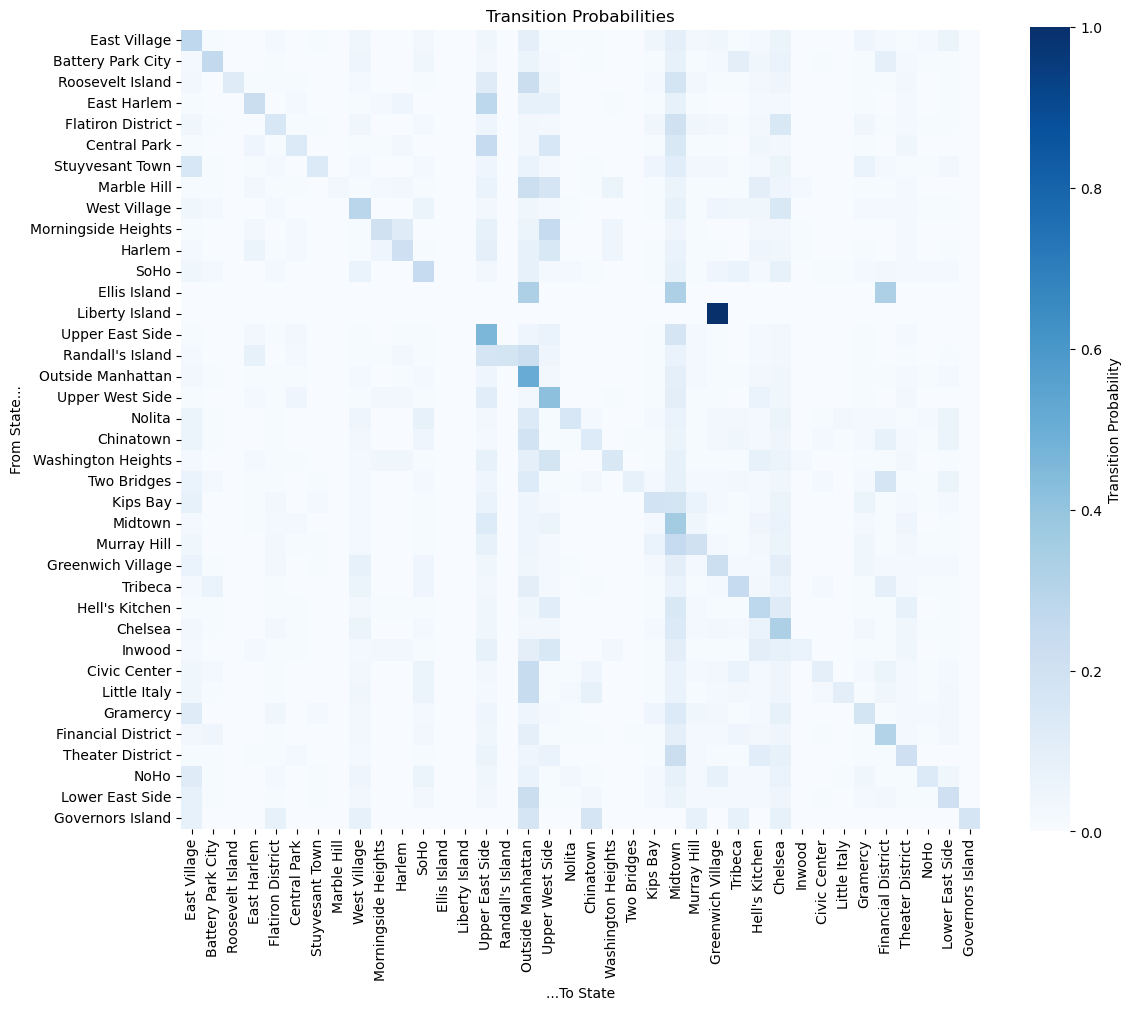

In [ ]:
# importing package

import matplotlib.pyplot as plt

# plotting in a heat map

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',       # Or 'Blues', 'plasma', whatever looks good
            square=True,          # Keep cells square
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

WHAT IS ???

### Explain why taxicabs are most likely order 1, and not 2 or more.
### Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
### Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?